## Exploratory Data Analysis

In [52]:
import pandas as pd
import re
import nltk
import pickle

## 1. Load Data

In [40]:
data = pd.read_csv('data/desc_data.csv')

In [42]:
data.columns.tolist()

['Gender ',
 'Age',
 'Title',
 'School Type Level',
 'What is the School location',
 'School Category',
 'State']

## 2. Load Vectors

In [61]:
activities = pd.read_csv('./data/tokens/activities.csv')

In [97]:
health_home_yes = pd.read_csv('./data/tokens/health_home_yes.csv')

In [98]:
health_home_no = pd.read_csv('./data/tokens/health_home_no.csv')

In [64]:
learning_mat_less = pd.read_csv('data/tokens/learning_mat_less.csv')

In [65]:
learning_mat_more = pd.read_csv('data/tokens/learning_mat_more.csv')

In [66]:
quantity_learning_less = pd.read_csv('data/tokens/quantity_learning_less.csv')

In [67]:
quantity_learning_more = pd.read_csv('data/tokens/quantity_learning_more.csv')

In [68]:
radio_lessons_qual_neg = pd.read_csv('data/tokens/radio_lessons_qual_neg.csv')

In [69]:
radio_lessons_qual_pos = pd.read_csv('data/tokens/radio_lessons_qual_neg.csv')

In [70]:
radio_likes = pd.read_csv('data/tokens/radio_likes.csv')

In [71]:
radio_school_neg = pd.read_csv('data/tokens/radio_school_neg.csv')

In [72]:
radio_school_pos = pd.read_csv('data/tokens/radio_school_pos.csv')

In [73]:
safety_home_no = pd.read_csv('data/tokens/safety_home_no.csv')

In [74]:
safety_home_yes = pd.read_csv('data/tokens/safety_home_yes.csv')

In [75]:
safety_school_concerns = pd.read_csv('data/tokens/safety_school_concerns.csv')

In [76]:
safety_school_neg = pd.read_csv('data/tokens/safety_school_neg.csv')

In [77]:
safety_school_pos = pd.read_csv('data/tokens/safety_school_pos.csv')

In [78]:
schoolwork_less = pd.read_csv('data/tokens/schoolwork_less.csv')

In [79]:
schoolwork_more = pd.read_csv('data/tokens/schoolwork_more.csv')

## 3. Data VS Vectors

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 3.1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

In [81]:
plt.rcParams['figure.figsize'] = [20 , 35]

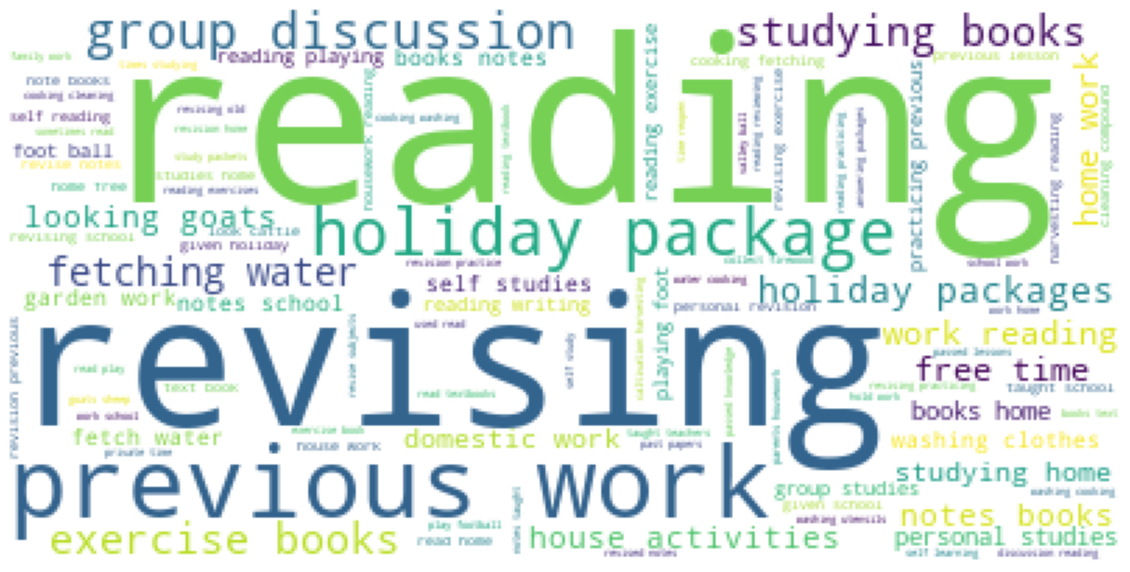

In [83]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(activities.sum().sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 3.2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [103]:
lista = [health_home_yes, health_home_no]
title = ['Why?','Why not?']

In [104]:
plt.rcParams['figure.figsize'] = [20 , 35]

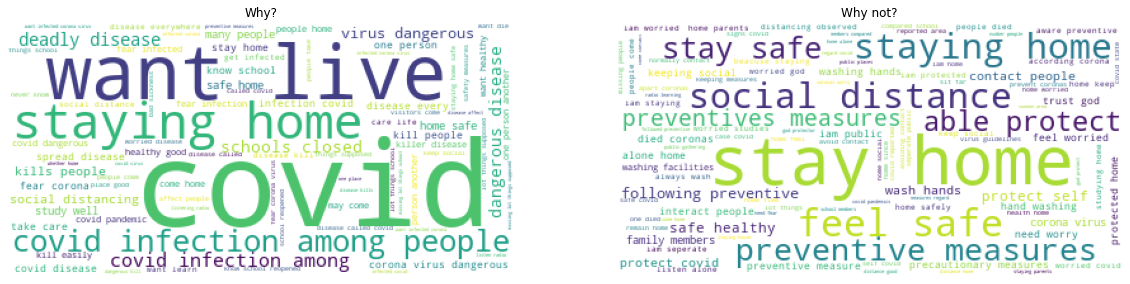

In [105]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [106]:
lista = [safety_home_no, safety_home_yes]
title = ['Why not?','Why?']

In [124]:
plt.rcParams['figure.figsize'] = [20 , 35]

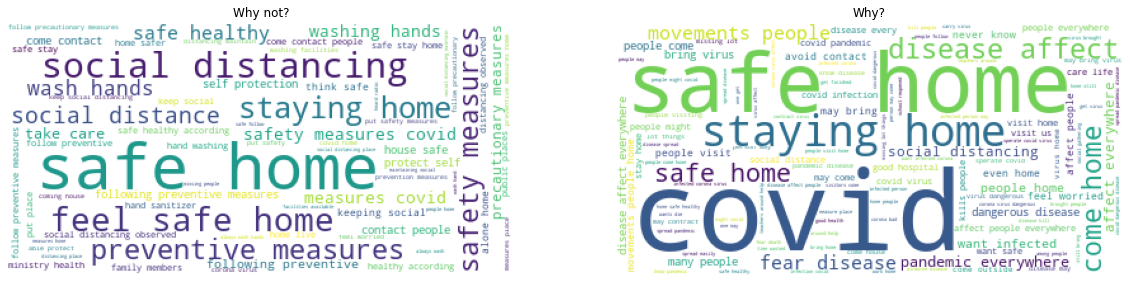

In [107]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.4. Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why

In [108]:
lista = [quantity_learning_less, quantity_learning_more]
title = ['Why less?','Why more?']

In [109]:
plt.rcParams['figure.figsize'] = [20 , 35]

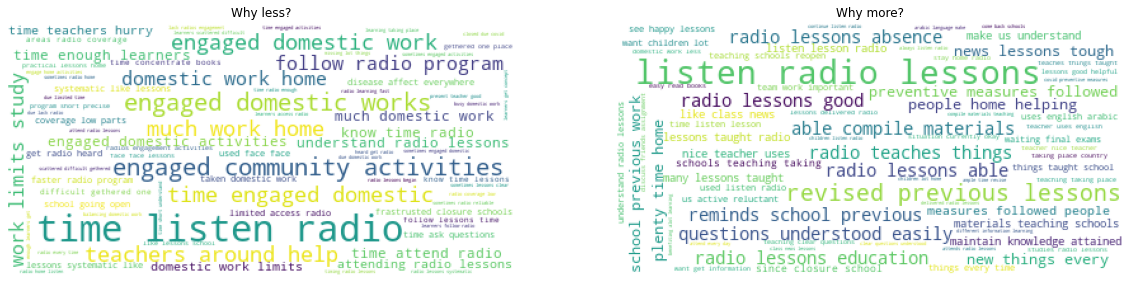

In [110]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.5. What is the quality of the radio lessons? How can the radio lessons be improved?

In [111]:
lista = [radio_lessons_qual_neg, radio_lessons_qual_pos]
title = ['Good quality','No good quality']

In [112]:
plt.rcParams['figure.figsize'] = [20 , 35]

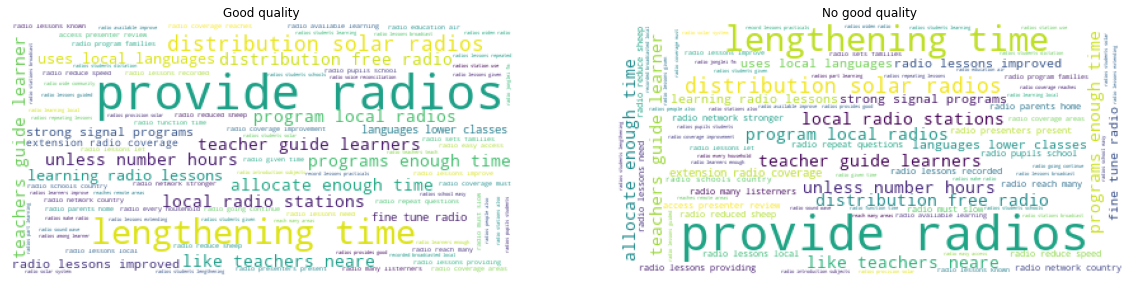

In [113]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.6. What do you like most about the radio lessons? What are the challenges with learning on the radio?

In [115]:
plt.rcParams['figure.figsize'] = [10 , 25]

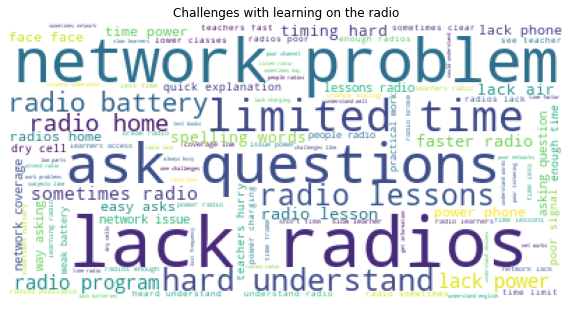

In [116]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(radio_likes.sum().sort_values())
plt.title('Challenges with learning on the radio')
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 3.7.a. When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why or why not?

In [117]:
lista = [safety_school_pos, safety_school_neg]
title = ['Why?','Why not?']

In [118]:
plt.rcParams['figure.figsize'] = [20 , 35]

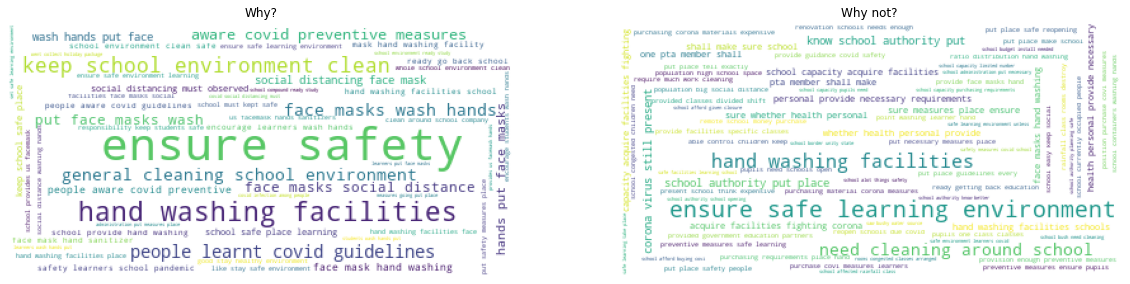

In [119]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.7.b. What are your concerns about returning to school?

In [120]:
plt.rcParams['figure.figsize'] = [10 , 25]

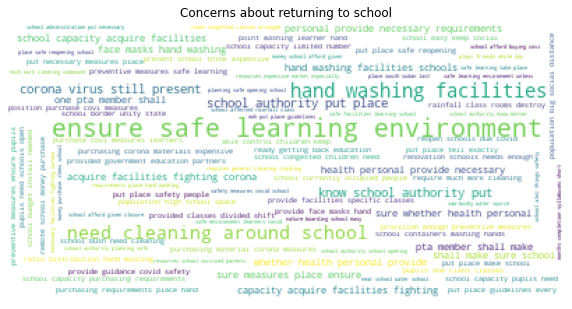

In [122]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tokens.sum().sort_values())
plt.title('Concerns about returning to school')
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 3.8. Are you/your learners doing more schoolwork or less schoolwork since the COVID-19 school closures? Why?

In [126]:
lista = [schoolwork_less, schoolwork_more]
title = ['Why less?','Why more?']

In [127]:
plt.rcParams['figure.figsize'] = [20 , 35]

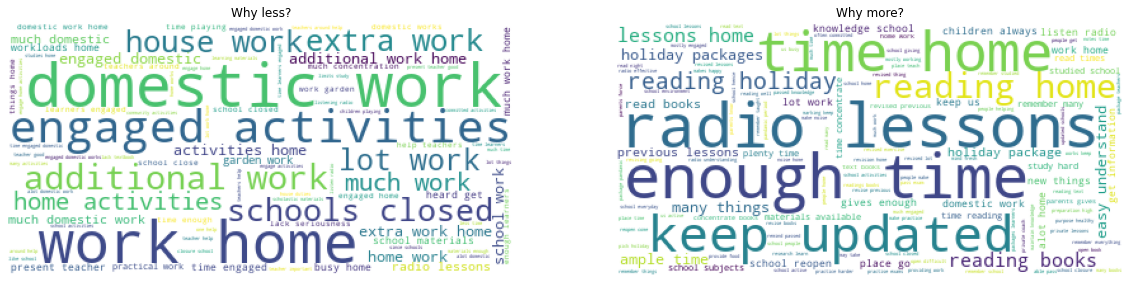

In [128]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.9. When schools reopen, would you still listen to radio lessons? Why or why not?

In [129]:
lista = [radio_school_pos, radio_school_neg]
title = ['Why?','Why not?']

In [130]:
plt.rcParams['figure.figsize'] = [20 , 35]

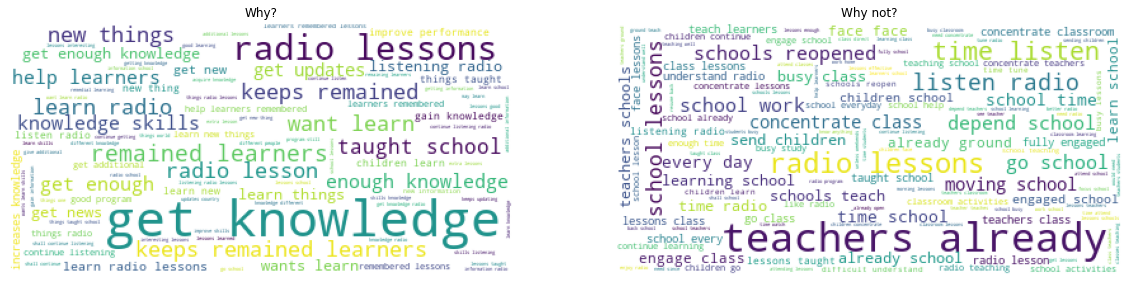

In [131]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

### 3.10. What materials are you using? How often do you use these materials? Do you find these materials more or less helpful than radio lessons? Why?

In [136]:
lista = [learning_mat_less, learning_mat_more]
title = ['Learning materials less helpful','Learning materials more helpful']

In [137]:
plt.rcParams['figure.figsize'] = [20 , 35]

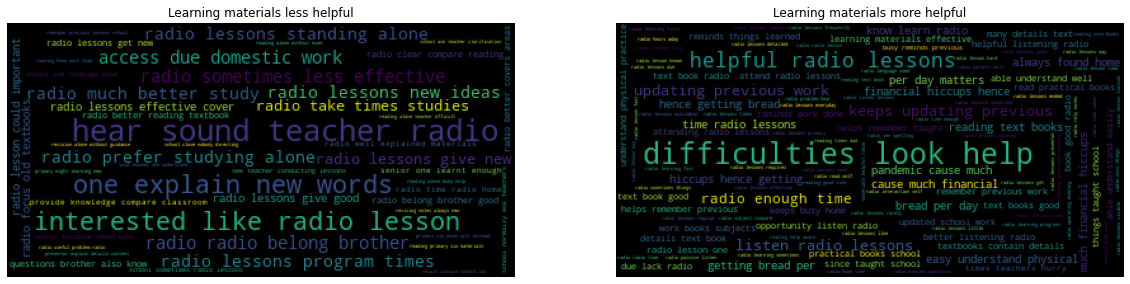

In [138]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='black')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()